In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
import os

In [3]:
base_dir = 'images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('images/train')

['clean', 'messy']

In [5]:
os.listdir('images/val')

['clean', 'messy']

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 17s - loss: 0.7300 - accuracy: 0.5400 - val_loss: 0.6887 - val_accuracy: 0.6000 - 17s/epoch - 675ms/step
Epoch 2/25
25/25 - 13s - loss: 0.6844 - accuracy: 0.5800 - val_loss: 0.6246 - val_accuracy: 0.7000 - 13s/epoch - 511ms/step
Epoch 3/25
25/25 - 13s - loss: 0.6373 - accuracy: 0.6700 - val_loss: 0.5920 - val_accuracy: 0.7500 - 13s/epoch - 513ms/step
Epoch 4/25
25/25 - 13s - loss: 0.6244 - accuracy: 0.7200 - val_loss: 0.4974 - val_accuracy: 0.8000 - 13s/epoch - 512ms/step
Epoch 5/25
25/25 - 13s - loss: 0.5733 - accuracy: 0.7700 - val_loss: 0.4692 - val_accuracy: 0.8000 - 13s/epoch - 510ms/step
Epoch 6/25
25/25 - 13s - loss: 0.6393 - accuracy: 0.7100 - val_loss: 0.5464 - val_accuracy: 0.8500 - 13s/epoch - 514ms/step
Epoch 7/25
25/25 - 13s - loss: 0.5721 - accuracy: 0.7800 - val_loss: 0.4648 - val_accuracy: 0.7000 - 13s/epoch - 508ms/step
Epoch 8/25
25/25 - 13s - loss: 0.7820 - accuracy: 0.5700 - val_loss: 0.6244 - val_accuracy: 0.5000 - 13s/epoch - 509ms/step
Epoch 9/

In [12]:
#import numpy as np
#from google.colab import files
#from tensorflow.keras.preprocessing import image
#import matplotlib.pyplot as plt
#%matplotlib inline

#uploaded = files.upload()

#for fn in uploaded.keys():
#   predicting images
#    path = fn
#    img = image.load_img(path, target_size=(150,150))
    
#    imgplot = plt.imshow(img)
#    x = image.img_to_array(img)
#    x = np.expand_dims(x, axis=0)
#    images = np.vstack([x])
    
#    classes = model.predict(images, batch_size=10)  
#    print(fn)
#    if classes==1:
#        print('messy')
#    else:
#        print('clean')

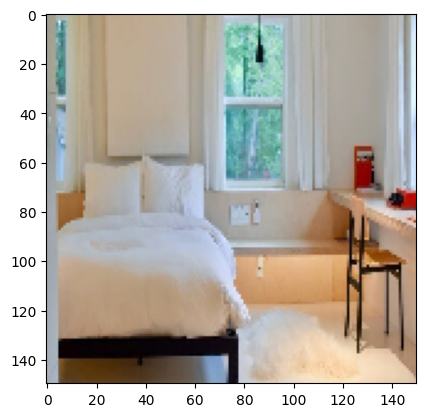

1/1 [==============================] - 0s 338ms/step
bersih


In [13]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Ganti 'nama_file.jpg' dengan nama file yang ingin Anda impor
file_path = 'clean_room.jpg'

# Load gambar dari path yang ditentukan
img = image.load_img(file_path, target_size=(150, 150))

# Tampilkan gambar
plt.imshow(img)
plt.show()

# Ubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Lakukan prediksi jika Anda memiliki model yang telah di-train
# Misalnya, model adalah model yang telah di-train sebelumnya
classes = model.predict(x, batch_size=10)

# Kemudian Anda dapat memeriksa hasil prediksi untuk menentukan apakah gambar "bersih" atau "berantakan"
# Misalnya:

if classes == 1:
    print('berantakan')
else:
    print('bersih')
